<a href="https://colab.research.google.com/github/feniltailor22/Machine_Learning/blob/main/kyphosis_prediction_using_Decision_Tree_and_Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('kyphosis.csv')

In [ ]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [ ]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


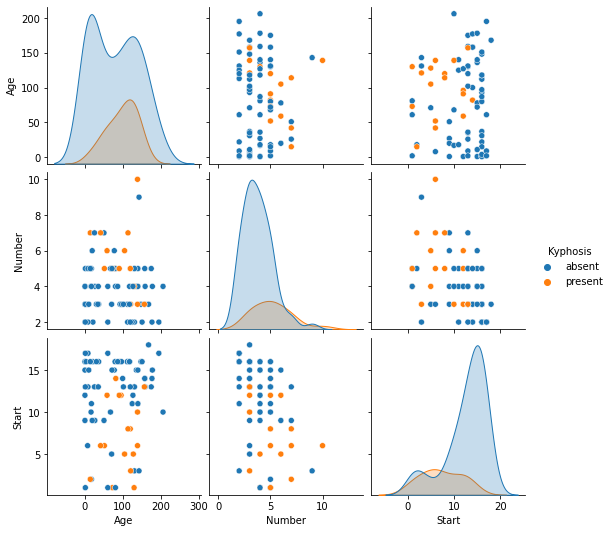

In [ ]:
sns.pairplot(df,hue='Kyphosis')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [ ]:
X=df[['Age', 'Number', 'Start']]
y=df['Kyphosis']

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree= DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf=5)

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions= dtree.predict(X_test)

In [ ]:
predictions

array(['absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'present', 'present', 'absent', 'present', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'present', 'present', 'present', 'absent', 'present',
       'absent'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.94      0.73      0.82        22
     present       0.25      0.67      0.36         3

    accuracy                           0.72        25
   macro avg       0.60      0.70      0.59        25
weighted avg       0.86      0.72      0.77        25



In [ ]:
print(confusion_matrix(y_test,predictions))

[[16  6]
 [ 1  2]]


In [ ]:
#Tree Visulisation

In [ ]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
features= list(df.columns[1:])
features

['Age', 'Number', 'Start']

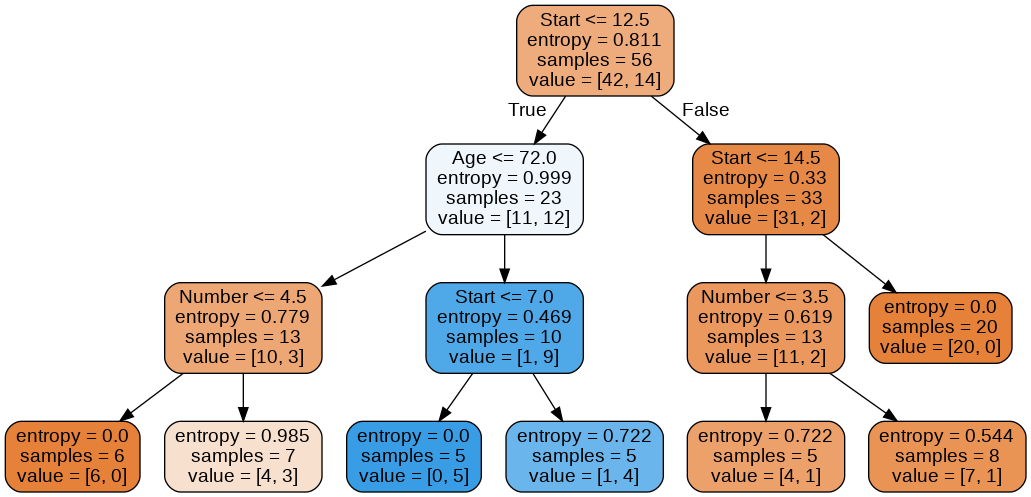

In [ ]:
#Visualisation of Decision tree
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [ ]:
#Decision tree is prone to overfitting. Hence, Random Forest Classifier is used to overcome it.
#Random Forest is less sesitive to Training Data. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc= RandomForestClassifier(n_estimators=1000, criterion='entropy') #n_estimator is number of trees in classifier

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_predictions= rfc.predict(X_test)

In [ ]:
rfc_predictions

array(['present', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'present', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'present', 'absent', 'absent',
       'present'], dtype=object)

In [ ]:
print(classification_report(y_test,rfc_predictions))

              precision    recall  f1-score   support

      absent       1.00      0.82      0.90        22
     present       0.43      1.00      0.60         3

    accuracy                           0.84        25
   macro avg       0.71      0.91      0.75        25
weighted avg       0.93      0.84      0.86        25



In [ ]:
print(confusion_matrix(y_test,rfc_predictions))

[[18  4]
 [ 0  3]]


In [ ]:
#predicting output for new data
New_Data= pd.DataFrame(data=[{'Age':105, 'Number':3, 'Start':5}],index=[1])
rfc.predict(New_Data)

array(['present'], dtype=object)